In [99]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as  mpl

In [100]:
mpl.rcParams[u'font.sans-serif'] = ['simhei']
mpl.rcParams['axes.unicode_minus'] = False

In [101]:
def read_data(y,s,c):
    df = pd.read_csv("lvr_land/"+ y +"-s" + s + "/" + c + "_lvr_land_A.csv",encoding='utf-8',low_memory=False)
    
    return df

In [102]:
def combine_DF(df1,df2):
    df = pd.concat([df1,df2],axis = 0)
    return df

In [103]:
def select_farmland(df):
    
    df = df[["鄉鎮市區","土地移轉總面積(平方公尺)","交易標的","都市土地使用分區","非都市土地使用分區","非都市土地使用編定","總價(元)","單價(元/平方公尺)"]]
    df = df[(df.交易標的 == "土地")]  
    df_farmland = df[(((df.非都市土地使用分區 == '特定農業區')|(df.非都市土地使用分區 == "一般農業區"))&(df.非都市土地使用編定 =="農牧用地"))]
    #排除都市土地
    df_farmland = df_farmland[df_farmland["都市土地使用分區"].isnull()]
    return df_farmland

In [104]:
def fill_nan_price(df_farmland):
    #modify zero or nan price
    df_ok = df_farmland[(df_farmland["單價(元/平方公尺)"].notnull())&(df_farmland["單價(元/平方公尺)"] != "0")]
    df = df_farmland[(df_farmland["單價(元/平方公尺)"].isnull())|(df_farmland["單價(元/平方公尺)"] == "0")]
    df = df[(df['土地移轉總面積(平方公尺)'] != "0")&(df['總價(元)'] != "0")]
    df["單價(元/平方公尺)"] = calculate_price(df['總價(元)'],df['土地移轉總面積(平方公尺)'])
    df_farmland = pd.concat([df_ok,df],axis = 0)
    return df_farmland

In [105]:
def calculate_price(total_price,area):
    return pd.to_numeric(total_price)/pd.to_numeric(area)

In [106]:
def calculate_mean(df_farmland):

    landpriceMean = pd.to_numeric(df_farmland['單價(元/平方公尺)']).mean()
   
    return landpriceMean

In [107]:
def calculate_gain(cityMeandict,div):
    
    #dict to df
    arr = list(cityMeandict.items())
    df = pd.DataFrame(arr, columns=['年份','單價'])
    
    #逐年漲幅
    gain = df["單價"].pct_change(div)
    
    return gain

In [108]:
def group_data(start_year,end_year,start_season,end_season,list_cityfilename):
    
    s = start_season
    df = pd.DataFrame()
    for y in range(start_year,end_year+1):
   
        while s<=4:
            for c in list_cityfilename:
                df_s =  readData(str(y),str(s),c)
                df = combineDF(df,df_s)
                
            if y == end_year and s == end_season:
                break
            s = s+1
        s=1
    # select farmland
    df_farmland = selectFarmland(df)
    # fill nan price
    df_farmland = fillNanprice(df_farmland)
    return df_farmland 

In [109]:
list_cityfilename = ['A','B','C','D','E','F','G','H','I','J','K','M','N','O','P','Q','T','U','V']
list_city = ['台北市','台中市','基隆市','台南市','高雄市','新北市','宜蘭縣','桃園縣','嘉義市','新竹縣','苗栗縣','南投縣','彰化縣','新竹市','雲林縣','嘉義縣','屏東縣','花蓮縣','台東縣']

START_SEASON = 4
END_SEASON = 2
START_YEAR = 101
END_YEAR = 107
s=START_SEASON 

aver_price_per_year ={}

for y in range(START_YEAR,END_YEAR+1):
    
    df = pd.DataFrame()
    
    while s<=4:
        for c in list_cityfilename:
            df_s =  read_data(str(y),str(s),c)
            df = combine_DF(df,df_s)
        if y == END_YEAR and s == END_SEASON:
            break
        s = s+1
    s=1
    
    # select farmland
    df_farmland = select_farmland(df)
    # fill nan price
    df_farmland = fill_nan_price(df_farmland)
    
    #台灣各年平均單價
    aver_price_per_year[y] = calculate_mean(df_farmland)*3.3058 #1ping = 3.3058 m^2

In [111]:
print("各年單價平均")
print("|年",end='')
for i in range(101,108):
    print("|"+str(i),end='')
print("|")
print("|單價（坪）",end='')
for key in aver_price_per_year:
    print("|"+"{:.1f}".format( aver_price_per_year[key]),end='')
print("|")

各年單價平均
|年|101|102|103|104|105|106|107|
|單價（坪）|11760.7|15217.7|15573.7|13437.0|12767.2|12191.1|12145.4|


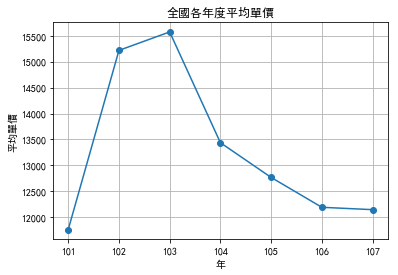

In [112]:
# plot 台灣逐年平均
plt.plot( aver_price_per_year.keys(), aver_price_per_year.values(),marker='o',linestyle='solid')
plt.xlabel("年")
plt.ylabel("平均單價")
plt.title("全國各年度平均單價")
plt.grid() 
plt.savefig("全國各年度平均單價")
plt.show()

In [113]:
list_cityfilename = ['A','B','C','D','E','F','G','H','I','J','K','M','N','O','P','Q','T','U','V']
list_city = ['台北市','台中市','基隆市','台南市','高雄市','新北市','宜蘭縣','桃園縣','嘉義市','新竹縣','苗栗縣','南投縣','彰化縣','新竹市','雲林縣','嘉義縣','屏東縣','花蓮縣','台東縣']

price ={}
#early
EARLY_START_SEASON = 4
EARLY_END_SEASON = 3
EARLY_START_YEAR = 101
EARLY_END_YEAR = 102

print("early year average")
df_farmland = group_data(EARLY_START_YEAR,EARLY_END_YEAR,EARLY_START_SEASON,EARLY_END_SEASON,list_cityfilename)    
price[0] = calculateMean(df_farmland)*3.3058 #1ping = 3.3058 m^2
print("{:.1f}".format(price[0]))

#recent

RECENT_START_SEASON = 3
RECENT_END_SEASON = 2
RECENT_START_YEAR = 106
RECENT_END_YEAR = 107

print("recent year average")
df_farmland = group_data(RECENT_START_YEAR,RECENT_END_YEAR,RECENT_START_SEASON,RECENT_END_SEASON,list_cityfilename)    
price[1] = calculateMean(df_farmland)*3.3058 #1ping = 3.3058 m^2
print("{:.1f}".format(price[1]))
    

early year average
13755.4
recent year average
12089.5


In [114]:
#全國總漲幅 
gain = calculateGain(price,1)
print("全國總漲幅")
print("{:.1f}".format(gain[1]*100)+"%")



全國總漲幅
-12.1%
